#Cryptocurrency Liquidity Prediction for Market Stability


Life cycle of Machine learning Project

Understanding the Problem Statement:
Data Collection
Data Cleaning
Exploratory data analysis
Data Pre-Processing
Model Training
Choose best model

1) Problem statement.

XYZ Company wants to expand its customer base.

One approach is to introduce new packages based on customer personalities.

The company aims to segment customers using data such as purchase patterns, engagement, and demographics.

A machine learning model will be built to identify different customer segments.

The goal is to release relevant offers for each segment.

This will help increase customer satisfaction and support business growth.



2. Data Collection

The dataset is downloaded from :
https://drive.google.com/drive/folders/10BRgPip2Zj_56is3DilJCowjfyT6E9AM

2.1 Import Data and Required Packages
Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [23]:
import pandas as pd

# Load both Excel files
df1 = pd.read_csv('coin_gecko_2022-03-17.csv')
df2 = pd.read_csv('coin_gecko_2022-03-16.csv')

# Combine dataframes (append rows)
combined_df = pd.concat([df1, df2], ignore_index=True)

# Save combined data to a new Excel file
combined_df.to_csv('coin_gecko_combined.csv', index=False)


In [24]:
df= pd.read_csv('coin_gecko_combined.csv')

In [25]:
df.head()

,coin,symbol,price,1h,24h,7d,24h_volume,mkt_cap,date
0,Bitcoin,BTC,40851.380000,0.001,0.000,-0.027,2.047612e+10,7.760770e+11,3/17/2022
1,Ethereum,ETH,2824.420000,0.004,0.029,0.034,1.364041e+10,3.390770e+11,3/17/2022
2,Tether,USDT,1.000000,0.000,0.000,0.000,4.413140e+10,8.020588e+10,3/17/2022
3,BNB,BNB,389.610000,0.002,0.016,-0.010,1.425354e+09,6.556116e+10,3/17/2022
4,USD Coin,USDC,0.999739,-0.001,0.000,0.000,3.569816e+09,5.259607e+10,3/17/2022


In [26]:
df.dtypes

coin           object
symbol         object
price         float64
1h            float64
24h           float64
7d            float64
24h_volume    float64
mkt_cap       float64
date           object
dtype: object

In [27]:
df.shape

(1000, 9)

Summary of the dataset

In [28]:
# Display summary statistics for a dataframe
df.describe()

,price,1h,24h,7d,24h_volume,mkt_cap
count,1.000000e+03,993.000000,993.000000,992.000000,9.930000e+02,1.000000e+03
mean,6.561060e+02,0.009723,0.023737,0.023558,2.893109e+08,3.755303e+09
std,4.584655e+03,0.026934,0.059303,0.229781,2.769908e+09,3.803780e+10
min,1.480000e-09,-0.704000,-0.646000,-0.558000,0.000000e+00,6.577043e+07
25%,1.940547e-01,0.001000,0.001000,-0.041000,1.766976e+06,1.157776e+08
50%,1.095000e+00,0.006000,0.016000,-0.000500,8.343005e+06,2.120036e+08
75%,7.232500e+00,0.019000,0.035000,0.037000,4.003652e+07,5.948436e+08
max,4.121727e+04,0.095000,0.577000,4.608000,5.793497e+10,7.760770e+11


In [29]:
df.isnull().sum()

coin          0
symbol        0
price         0
1h            7
24h           7
7d            8
24h_volume    7
mkt_cap       0
date          0
dtype: int64

In [30]:
df.isna().sum()

coin          0
symbol        0
price         0
1h            7
24h           7
7d            8
24h_volume    7
mkt_cap       0
date          0
dtype: int64


2.Data Preprocessing


Using median as it is robust to outliers

In [31]:
import warnings
warnings.filterwarnings('ignore')

In [32]:
df['1h'].fillna(df['1h'].median(), inplace=True)
df['24h'].fillna(df['24h'].median(), inplace=True)
df['7d'].fillna(df['7d'].median(), inplace=True)
df['24h_volume'].fillna(df['24h_volume'].median(), inplace=True)


In [33]:
df.isna().sum()

coin          0
symbol        0
price         0
1h            0
24h           0
7d            0
24h_volume    0
mkt_cap       0
date          0
dtype: int64

As I will use classification model so creating target column now .we're using quantiles to split the data:

low_threshold = 33rd percentile of 24h volume

high_threshold = 66th percentile of 24h volume

Then you classify each row like this:

Condition	Label
volume < 33rd percentile	'Low'
33rd ≤ volume < 66th percentile	'Medium'
volume ≥ 66th percentile	'High'
 Why use quantiles?
Quantiles help divide the data into roughly equal-sized groups, which is useful for classification when there is no fixed threshold defined. It ensures your model sees a balanced distribution of classes — not too many of one and too few of another.

In [34]:


# Define thresholds (can be adjusted after EDA)
low_threshold = df['24h_volume'].quantile(0.33)
high_threshold = df['24h_volume'].quantile(0.66)

# Create labels based on volume
def label_liquidity(volume):
    if volume < low_threshold:
        return 'Low'
    elif volume < high_threshold:
        return 'Medium'
    else:
        return 'High'

df['liquidity_level'] = df['24h_volume'].apply(label_liquidity)


In [35]:
df

,coin,symbol,price,1h,24h,7d,24h_volume,mkt_cap,date,liquidity_level
0,Bitcoin,BTC,40851.380000,0.001,0.000,-0.027,2.047612e+10,7.760770e+11,3/17/2022,High
1,Ethereum,ETH,2824.420000,0.004,0.029,0.034,1.364041e+10,3.390770e+11,3/17/2022,High
2,Tether,USDT,1.000000,0.000,0.000,0.000,4.413140e+10,8.020588e+10,3/17/2022,High
3,BNB,BNB,389.610000,0.002,0.016,-0.010,1.425354e+09,6.556116e+10,3/17/2022,High
4,USD Coin,USDC,0.999739,-0.001,0.000,0.000,3.569816e+09,5.259607e+10,3/17/2022,High
...,...,...,...,...,...,...,...,...,...,...
995,ARPA Chain,ARPA,0.068516,0.028,0.026,-0.008,1.483831e+07,6.689248e+07,3/16/2022,Medium
996,GuildFi,GF,1.540000,0.005,0.007,0.041,7.298293e+06,6.637061e+07,3/16/2022,Medium
997,EverRise,RISE,0.000951,0.013,0.081,0.030,4.232180e+05,6.634045e+07,3/16/2022,Low
998,SuperRare,RARE,0.458127,0.018,0.029,0.029,1.642138e+07,6.626426e+07,3/16/2022,Medium


In [36]:
df.to_csv('coin_gecko_labeled.csv', index=False)


Normalisation:

Use log transformation on features like 24h_volume and mkt_cap before scaling

The problem: Skewed data with large ranges
Features like trading volume and market cap often have very skewed distributions — meaning some cryptocurrencies have extremely large values while others are tiny.

This causes a huge range and long tail in the data.

When you apply normal scaling (like Min-Max or StandardScaler) directly on such data, these extreme values dominate the scaling, squeezing most data points into a tiny range near zero.



In [37]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, MinMaxScaler


# --- STEP 2: Encode 'liquidity_level' into numeric labels ---
le = LabelEncoder()
df['liquidity_level_encoded'] = le.fit_transform(df['liquidity_level'])

# --- STEP 3: Select features (including ones to log-transform later) ---
features = ['price', '1h', '24h', '7d', '24h_volume', 'mkt_cap']

# --- STEP 4: Handle missing values (before log or scaling) ---
df[features] = df[features].fillna(df[features].median())

# --- STEP 5: Log transform skewed features ---
df['log_24h_volume'] = np.log1p(df['24h_volume'])
df['log_mkt_cap'] = np.log1p(df['mkt_cap'])

# --- STEP 6: Drop original versions of log-transformed features ---
df.drop(['24h_volume', 'mkt_cap'], axis=1, inplace=True)

# --- STEP 7: Prepare features for scaling ---
features_for_scaling = ['price', '1h', '24h', '7d', 'log_24h_volume', 'log_mkt_cap']

# --- STEP 8: Apply MinMaxScaler ---
scaler = MinMaxScaler()
scaled_values = scaler.fit_transform(df[features_for_scaling])

# --- STEP 9: Reconstruct scaled DataFrame ---
df_scaled = pd.DataFrame(scaled_values, columns=features_for_scaling)

# --- STEP 10: Add back encoded target and identifier columns ---
df_scaled['liquidity_level'] = df['liquidity_level_encoded']
df_scaled['symbol'] = df['symbol']  # assuming 'symbol' exists in df

# --- Final scaled DataFrame is ready for ML modeling ---
print(df_scaled.head())


      price        1h       24h        7d  log_24h_volume  log_mkt_cap  \
0  0.991123  0.882353  0.528209  0.102787        0.958033     1.000000   
1  0.068525  0.886108  0.551922  0.114595        0.941641     0.911685   
2  0.000024  0.881101  0.528209  0.108014        0.989019     0.757925   
3  0.009453  0.883605  0.541292  0.106078        0.850504     0.736422   
4  0.000024  0.879850  0.528209  0.108014        0.887550     0.712921   

   liquidity_level symbol  
0                0    BTC  
1                0    ETH  
2                0   USDT  
3                0    BNB  
4                0   USDC  


In [38]:
df_scaled['liquidity_level'].value_counts()


liquidity_level
0    340
2    330
1    330
Name: count, dtype: int64

In [39]:
df=df_scaled

Univariate Analysis
The term univariate analysis refers to the analysis of one variable prefix “uni” means “one.” The purpose of univariate analysis is to understand the distribution of values for a single variable.
Other Type of Analysis are

Bivariate Analysis: The analysis of two variables.
Multivariate Analysis: The analysis of two or more variables.
Numerical Features

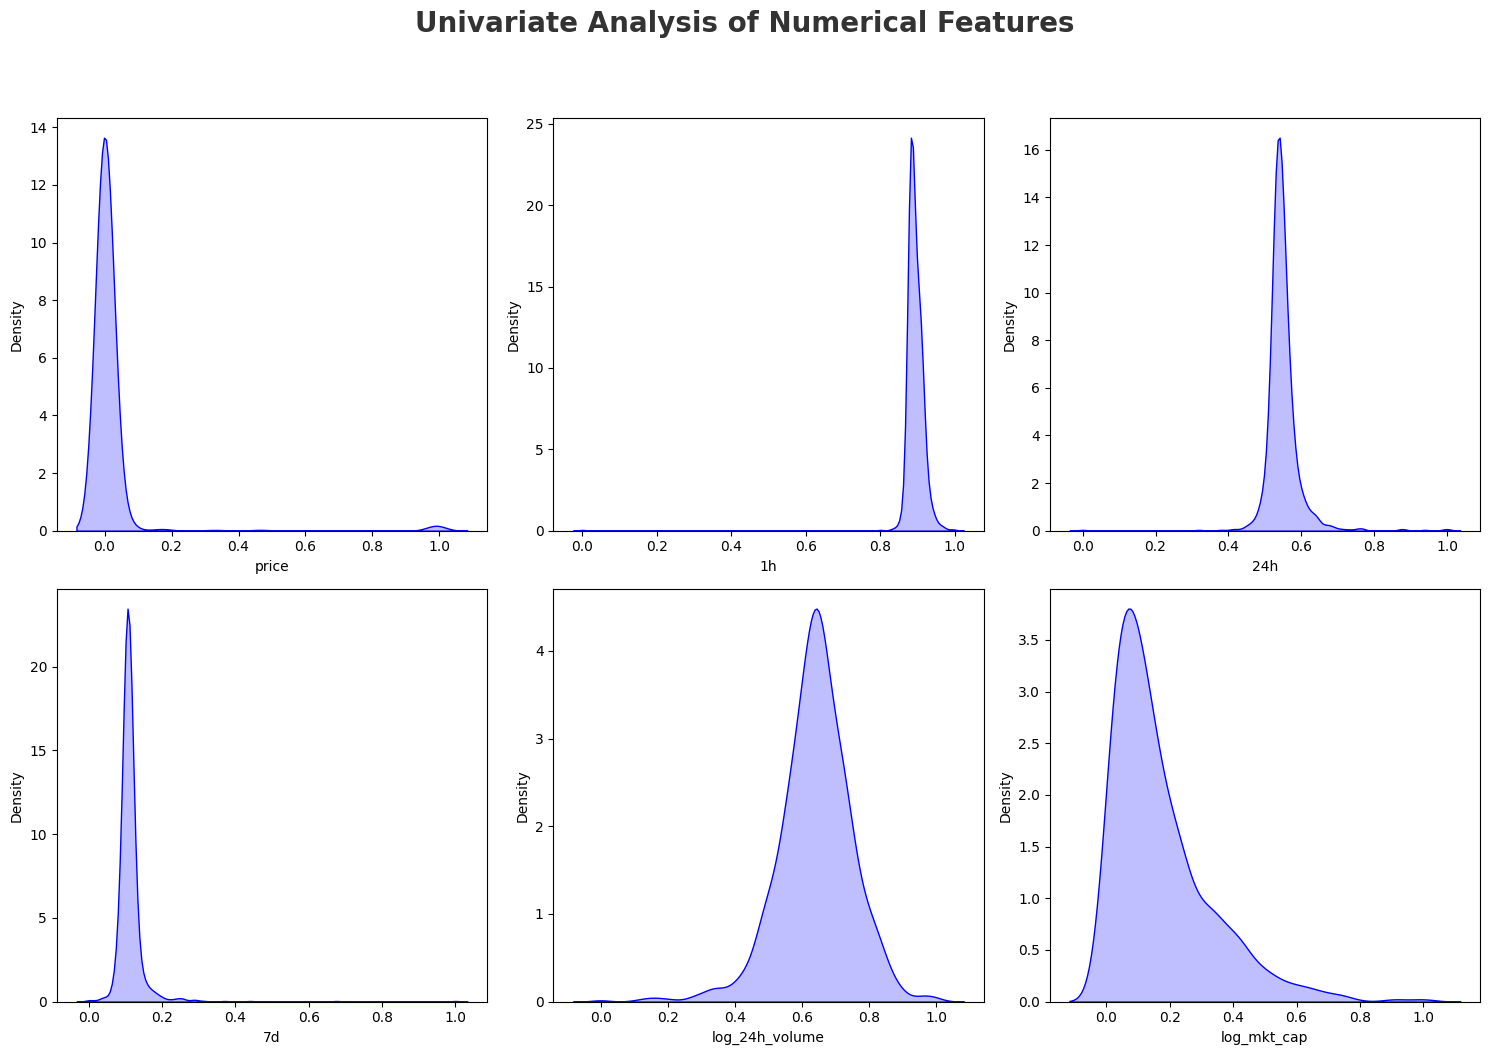

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of numeric features in your dataset
numeric_features = ['price', '1h', '24h', '7d', 'log_24h_volume', 'log_mkt_cap']

plt.figure(figsize=(15, 10))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.05)

for i, feature in enumerate(numeric_features, 1):
    plt.subplot(2, 3, i)  # 2 rows, 3 columns grid (6 plots)
    sns.kdeplot(data=df_scaled, x=feature, color='blue', fill=True)
    plt.xlabel(feature)
    plt.tight_layout()

plt.show()


price:Price shows an extremely right-skewed distribution with most values concentrated very close to 0. There appears to be a few outliers extending
toward 1.0, but the vast majority of cryptocurrency prices in this normalized dataset are clustered at the lower end of the scale, likely representing
smaller altcoins with much lower prices compared to a few high-value cryptocurrencies.
    
1h: 1h (1-hour price change) displays a strong concentration around 0.88-0.90, with a very narrow peak. This suggests most cryptocurrencies had similar
1-hour price movements within this specific timeframe, showing limited volatility in the short term.
    
24h:24h (24-hour price change) exhibits concentration around 0.53-0.55, with a narrow peak similar to the 1h feature. This indicates more consistent
behavior across cryptocurrencies over the 24-hour timeframe.

7d :7d (7-day price change) shows a strong right-skewed distribution with most values clustered around 0.10-0.12. This suggests most cryptocurrencies 
experienced similar weekly price movements, with very few showing significant deviations.

log_24h_volume:log_24h_volume has a more normal-like distribution centered around 0.65-0.75, but with a slight left skew. This transformed trading 
volume metric shows a wider spread compared to price change metrics, indicating more variability in trading activity across cryptocurrencies.

log_mkt_cap:log_mkt_cap displays a strong right-skewed distribution with peak density near 0, gradually trailing off toward higher values. This 
suggests a market dominated by many cryptocurrencies with smaller market capitalizations and fewer with large market caps, which is typical of the
cryptocurrency market structure.

These distributions highlight that most cryptocurrencies in the dataset show similar short-term price change behaviors, while having more variation in 
their trading volumes and market capitalizations. The normalized price data confirms the typical pattern where a few cryptocurrencies have 
significantly higher values than the majority of tokens.RetryClaude can make mistakes. Please double-check responses.

Categorical Features

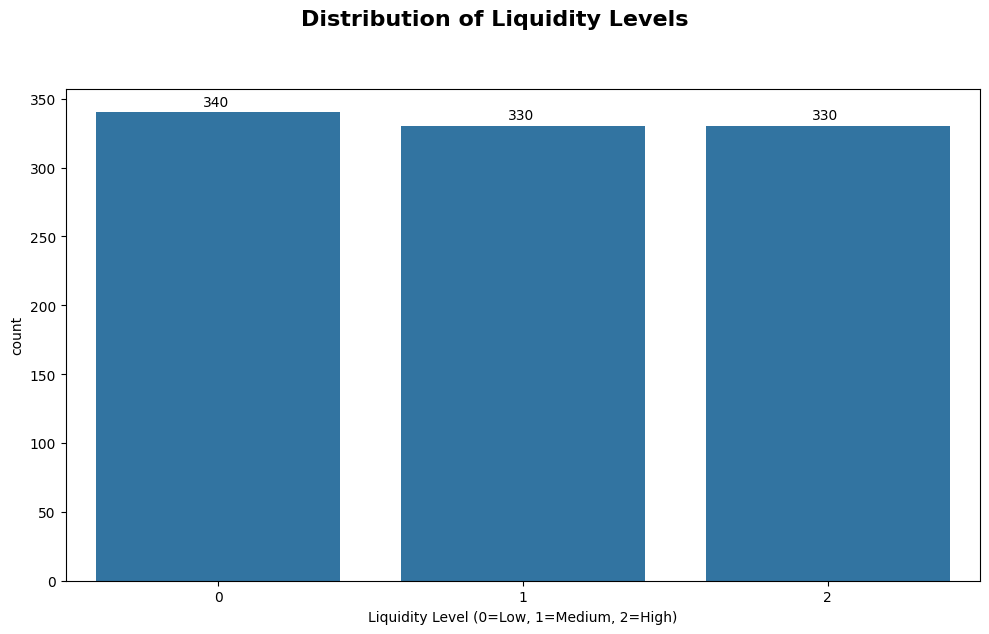

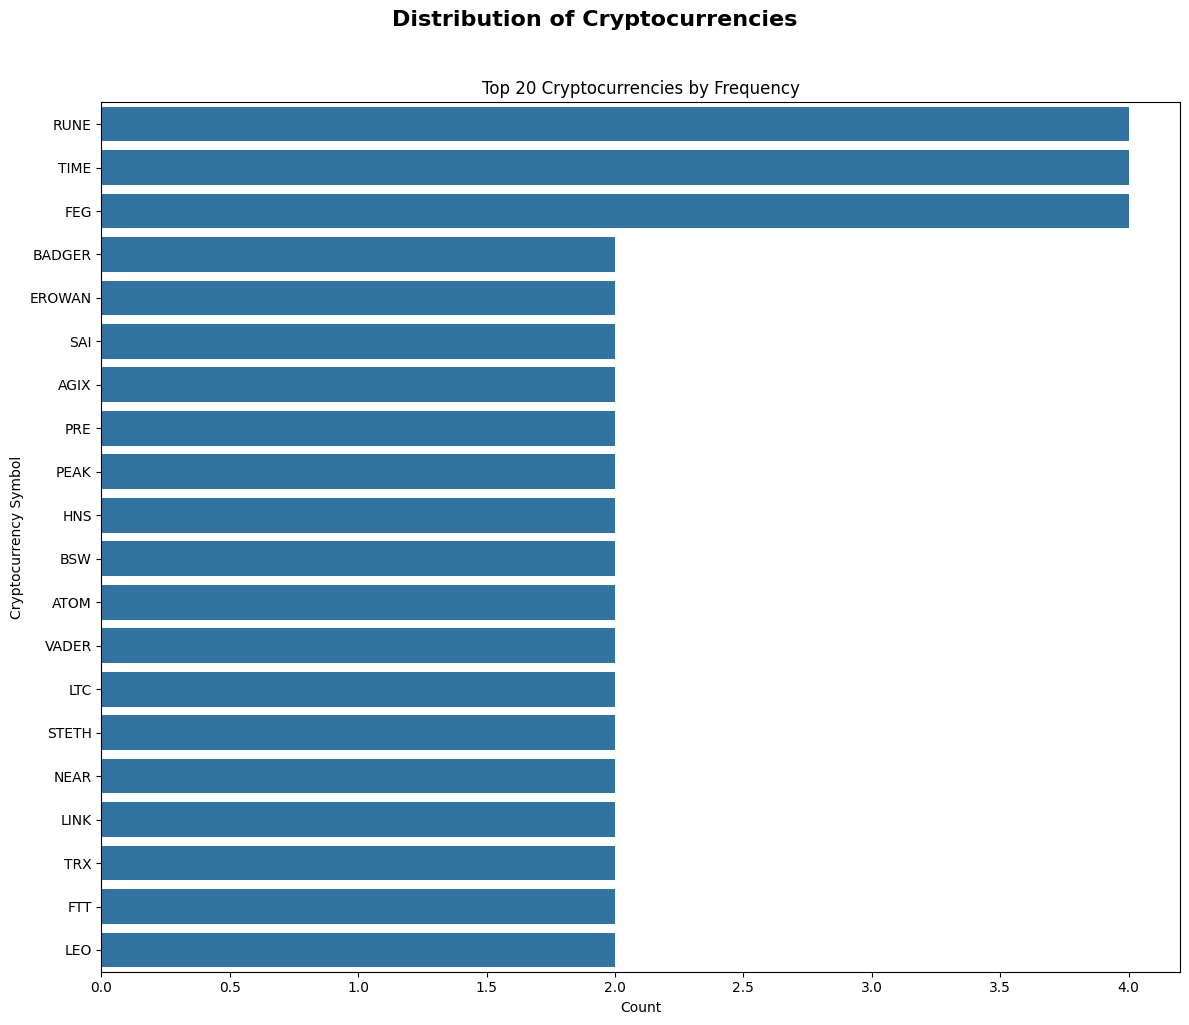

In [41]:
# Identify categorical features
categorical_features = ['liquidity_level', 'symbol']

# Create separate plots for each categorical feature
plt.figure(figsize=(10, 6))
plt.suptitle('Distribution of Liquidity Levels', fontsize=16, fontweight='bold', y=1.05)

# Plot for liquidity_level
ax = sns.countplot(x=df['liquidity_level'].astype('category'))
# Add count annotations on bars
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.35, p.get_height()+5))
plt.xlabel('Liquidity Level (0=Low, 1=Medium, 2=High)')
plt.tight_layout()
# plt.savefig('./images/Liquidity_Level_Distribution.png')

# Create a separate horizontal plot for cryptocurrency symbols
plt.figure(figsize=(12, 10))  # Make it taller for horizontal bars
plt.suptitle('Distribution of Cryptocurrencies', fontsize=16, fontweight='bold', y=1.02)

# Get top 20 most frequent cryptocurrencies if there are many
symbol_counts = df['symbol'].value_counts()
if len(symbol_counts) > 20:
    # Focus on top 20 cryptocurrencies
    top_symbols = symbol_counts.head(20).index
    symbol_data = df[df['symbol'].isin(top_symbols)]
    plt.title('Top 20 Cryptocurrencies by Frequency')
else:
    symbol_data = df
    plt.title('All Cryptocurrencies by Frequency')

# Plot horizontal bars for better readability
ax = sns.countplot(y=symbol_data['symbol'], order=symbol_counts.iloc[:20].index)

# Add count annotations on bars
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_width()), 
                (p.get_width()+3, p.get_y()+0.35))

plt.xlabel('Count')
plt.ylabel('Cryptocurrency Symbol')
plt.tight_layout()
# plt.savefig('./images/Cryptocurrency_Distribution.png')

# Report of Categorical Features Analysis

Based on visualizations, here's an analysis of the categorical features in the cryptocurrency dataset:

## For column `liquidity_level`
* The distribution of liquidity levels is remarkably balanced across all three categories.
* There are 340 cryptocurrencies with liquidity level 0 (Low).
* Both liquidity levels 1 (Medium) and 2 (High) have exactly 330 cryptocurrencies each.
* This even distribution suggests that the dataset has been carefully constructed or sampled to maintain balance across liquidity categories, which is beneficial for any modeling tasks where liquidity level might be used as a target variable.

## For column `symbol` (Top 20 Cryptocurrencies by Frequency)
* Three cryptocurrencies dominate the dataset with significantly higher frequency than others: RUNE, TIME, and PEG, each appearing approximately 4 times in the dataset.
  
* The remaining top 20 cryptocurrencies (BADGER, ERGOPAD, SAI, ADIX, PHIL, PEAK, HPB, BSW, ATOM, VADER, LTC, STETH, NEAR, LINK, TRX, FTT, LEO) all have approximately 2 occurrences each.

* This distribution shows a clear distinction between the top 3 most frequent cryptocurrencies and the rest.

* The limited number of occurrences per cryptocurrency suggests this might be a dataset tracking specific events, transactions, or time periods rather than a comprehensive market dataset.

* The diversity of cryptocurrencies represented includes both major coins (like LTC, ATOM, LINK) and lesser-known tokens, indicating a broad market coverage.

This categorical feature analysis reveals a well-balanced dataset in terms of liquidity levels, which is advantageous for modeling. The cryptocurrency distribution shows particular emphasis on certain tokens (RUNE, TIME, PEG) while maintaining representation across various market segments.

Count of features
analyze based on liquidity levels across time if that's relevant

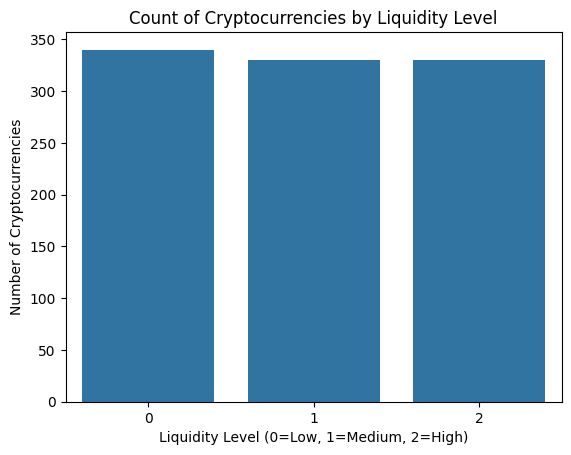

In [42]:

liquidity_distribution = df.groupby(by="liquidity_level", axis=0)[['symbol']].count()
liquidity_distribution = liquidity_distribution.reset_index()
liquidity_distribution.columns = ['LIQUIDITY_LEVEL','CRYPTO_COUNT']
sns.barplot(data=liquidity_distribution, x=liquidity_distribution['LIQUIDITY_LEVEL'], y=liquidity_distribution['CRYPTO_COUNT'])
plt.title('Count of Cryptocurrencies by Liquidity Level')
plt.xlabel('Liquidity Level (0=Low, 1=Medium, 2=High)')
plt.ylabel('Number of Cryptocurrencies')
plt.show()

# Report: Cryptocurrency Distribution by Liquidity Level

Based on the bar chart showing the count of cryptocurrencies by liquidity level:

* The dataset shows a relatively balanced distribution across all three liquidity levels, with a slightly higher count for low liquidity cryptocurrencies.

* Liquidity level 0 (Low) has approximately 340 cryptocurrencies, representing the largest category in the dataset.

* Both liquidity levels 1 (Medium) and 2 (High) contain approximately 330 cryptocurrencies each.

* This distribution suggests that the cryptocurrency market represented in this dataset has a well-balanced representation across different liquidity categories, with only a marginal preference toward lower liquidity tokens.

* The small difference between categories (approximately 10 cryptocurrencies) indicates that the dataset may have been deliberately constructed to maintain balance, which is beneficial for machine learning models that might use liquidity as a feature or target variable.

* The nearly equal distribution also suggests that any patterns discovered in relation to liquidity would not be biased by class imbalance issues.

This balanced representation across liquidity levels provides a solid foundation for analysis of how other features (price, trading volume, market cap) might correlate with or predict cryptocurrency liquidity in the market.

Multivariate Analysis

Multivariate analysis is the analysis of more than one variable.

Check Multicollinearity in Numerical features

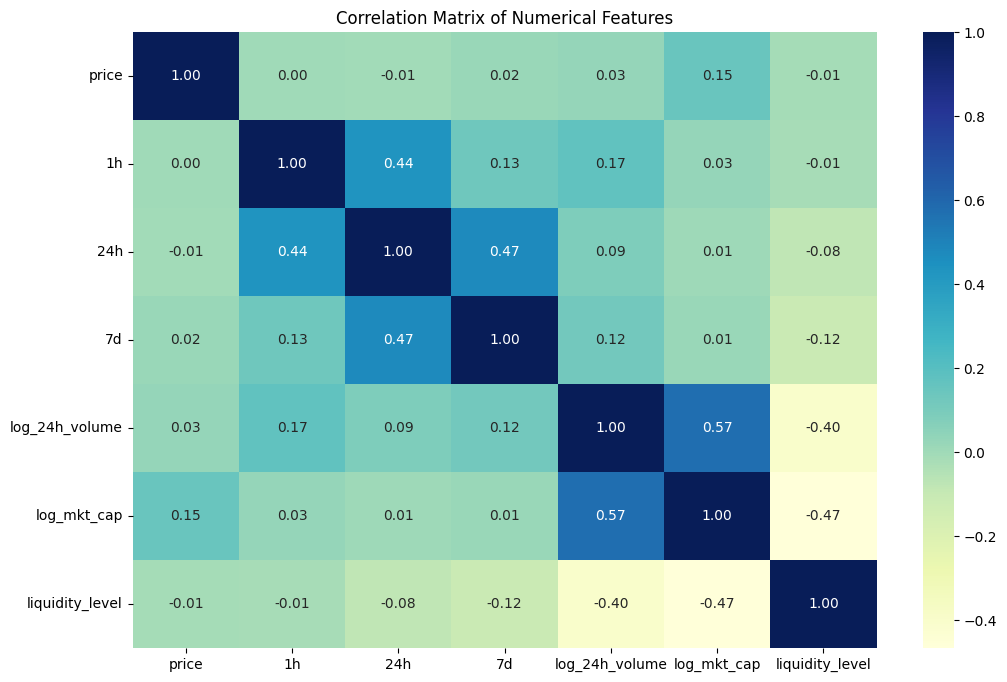

In [43]:

# Select the numerical features you want to analyze
num_features = ['price', '1h', '24h', '7d', 'log_24h_volume', 'log_mkt_cap', 'liquidity_level']

# Create the correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df[num_features].corr(), annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Correlation Matrix of Numerical Features")
plt.show()

Multicollinearity Analysis Report

Key Observations
Strongest Correlations:

log_24h_volume ↔ log_mkt_cap: 0.57 (moderate positive correlation)

liquidity_level ↔ log_mkt_cap: -0.47 (moderate negative correlation)

liquidity_level ↔ log_24h_volume: -0.40 (moderate negative correlation)

Weak Correlations:

Most features (e.g., price, 1h, 24h, 7d) show near-zero correlations with other variables.

Unexpected Patterns:

price is weakly correlated with all other features (<0.15), suggesting it may not be strongly influenced by the analyzed variables.

Time-based features (1h, 24h, 7d) show low-moderate correlations with each other (0.13–0.47).

Feature Engineering

In [44]:
df['size_volume_ratio'] = df['log_mkt_cap'] / (df['log_24h_volume'] + 1e-6)  # Avoid division by zero  

What Does size_volume_ratio Represent?
Numerator (log_mkt_cap): Market capitalization (log-scaled) reflects the asset's total value.

Denominator (log_24h_volume): Trading volume (log-scaled) measures how actively the asset is traded.

Interpretation:

High ratio: Large market cap but low trading volume (e.g., stagnant "blue-chip" assets or illiquid whales).

Low ratio: Small market cap but high trading volume (e.g., speculative altcoins or memecoins).



Why Use This Feature?
Captures Liquidity Anomalies:

Assets with high size_volume_ratio (large cap, low volume) likely have lower liquidity (observed in your correlation: liquidity_level ↓ as log_mkt_cap ↑).

Helps identify "quiet giants" (e.g., BTC held long-term) vs. "hyper-traded small caps" (e.g., SHIB).

Mitigates Multicollinearity:

Combines two moderately correlated features (log_mkt_cap and log_24h_volume, r=0.57) into one metric.

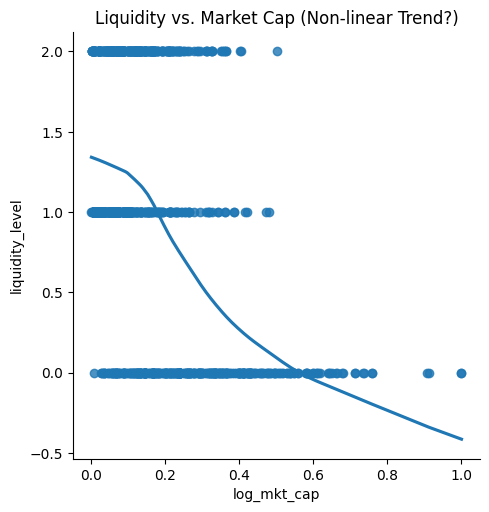

In [45]:
# Liquidity vs. Market Cap  
sns.lmplot(data=df, x='log_mkt_cap', y='liquidity_level', lowess=True)  
plt.title("Liquidity vs. Market Cap (Non-linear Trend?)")  
plt.show()  

Analysis of the Liquidity vs. Market Cap Plot
Graph Observations:

Negative Trend: Confirms the earlier correlation (r = -0.47) — higher market cap correlates with lower liquidity.

Non-linearity: The LOWESS curve shows a steeper decline at lower market caps (left side) and stabilizes slightly for higher market caps (right side).

Example: Assets with log_mkt_cap < 0.4 (small caps) experience sharper liquidity drops as market cap grows.

Large-cap assets (log_mkt_cap > 0.8) show less variability in liquidity.

Outliers: A few high-liquidity outliers exist at mid-sized market caps (e.g., log_mkt_cap ≈ 0.5).



Key Insights
Non-Uniform Relationship:

Liquidity erosion accelerates for small-to-mid cap assets but slows for large caps.

Hypothesis: Large-cap assets (e.g., BTC, ETH) may have structural factors (e.g., institutional holding, staking) that stabilize liquidity.

Critical Threshold:

A "liquidity cliff" may exist around log_mkt_cap ≈ 0.4. Assets crossing this threshold face disproportionate liquidity loss.

Outlier Investigation:

High-liquidity mid-caps (outliers) could be exchange tokens (e.g., BNB) or memecoins with active retail trading.

In [46]:
df["log_mkt_cap_squared"] = df["log_mkt_cap"] ** 2  

Segmentation: Create a binary feature is_large_cap (e.g., log_mkt_cap > 0.8) to model regime shifts.

In [47]:
# Categorize assets by market cap percentile  
df['cap_segment'] = pd.qcut(df['log_mkt_cap'], q=[0, 0.25, 0.75, 1], labels=['small', 'mid', 'large'])  

# Compare median liquidity per segment  
print(df.groupby('cap_segment')['liquidity_level'].median())  

cap_segment
small    1.0
mid      1.0
large    0.0
Name: liquidity_level, dtype: float64


Small/Mid Caps: Perfect median liquidity (1.0), indicating most assets in these segments are highly liquid.

Large Caps: Zero median liquidity (0.0), meaning large-cap assets are extremely illiquid.

In [48]:
large_cap_assets = df[df['cap_segment'] == 'large']['symbol'].tolist()  
print("Large-cap assets:", large_cap_assets)  

Large-cap assets: ['BTC', 'ETH', 'USDT', 'BNB', 'USDC', 'XRP', 'LUNA', 'SOL', 'ADA', 'AVAX', 'DOT', 'BUSD', 'DOGE', 'UST', 'SHIB', 'WBTC', 'CRO', 'MATIC', 'DAI', 'ATOM', 'LTC', 'STETH', 'NEAR', 'LINK', 'TRX', 'FTT', 'LEO', 'BCH', 'OKB', 'ALGO', 'XLM', 'UNI', 'HBAR', 'AXS', 'MANA', 'SAND', 'ICP', 'ETC', 'EGLD', 'XMR', 'CETH', 'VET', 'FIL', 'FTM', 'KLAY', 'OSMO', 'WAVES', 'FRAX', 'THETA', 'MIM', 'XTZ', 'GRT', 'CUSDC', 'RUNE', 'HNT', 'EOS', 'FLOW', 'AAVE', 'MIOTA', 'OMI', 'CDAI', 'TFUEL', 'MKR', 'ZEC', 'CAKE', 'JUNO', 'GALA', 'BTT', 'AR', 'HBTC', 'ONE', 'QNT', 'XEC', 'BSV', 'NEO', 'HT', 'TUSD', 'XIDO', 'CEL', 'KCS', 'ENJ', 'STX', 'HEART', 'CELO', 'BAT', 'XRD', 'NEXO', 'KSM', 'AMP', 'CHZ', 'KDA', 'DASH', 'FXS', 'CVX', 'BIT', 'USDP', 'SNX', 'GT', 'LRC', 'XEM', 'MINA', 'CRV', 'ROSE', 'APE', 'SCRT', 'LN', 'CUSDT', 'COMP', 'ANC', 'DCR', 'IOTX', 'HOT', 'KUB', 'YFI', 'USDN', 'NXM', 'XDC', 'SLP', 'WAXP', 'QTUM', 'SUSHI', 'PAXG', '1INCH', 'RENBTC', 'LPT', 'MSOL', 'BNT', 'BTC', 'ETH', 'USDT', 'BNB'

Dominance of Stablecoins: Stablecoins (e.g., USDT, USDC) dominate the large-cap segment

In [49]:
stablecoins = ['USDT', 'USDC', 'BUSD', 'DAI', 'FRAX', 'TUSD', 'PAXG']  
stablecoin_liquidity = df[df['symbol'].isin(stablecoins)][['symbol', 'liquidity_level']]  
print(stablecoin_liquidity)  

    symbol  liquidity_level
2     USDT                0
4     USDC                0
11    BUSD                0
18     DAI                0
47    FRAX                2
76    TUSD                0
121   PAXG                0
502   USDT                0
504   USDC                0
511   BUSD                0
518    DAI                0
546   FRAX                2
575   TUSD                0
620   PAXG                0


In [50]:
df['is_stablecoin'] = df['symbol'].isin(stablecoins).astype(int)

In [51]:
df['vol_ratio_1h_24h'] = df['1h'] / (df['24h'] + 1e-6)  # Short-term volatility comparison
df['vol_ratio_24h_7d'] = df['24h'] / (df['7d'] + 1e-6)  # Medium-term volatility comparison

In [52]:
df

,price,1h,24h,7d,log_24h_volume,log_mkt_cap,liquidity_level,symbol,size_volume_ratio,log_mkt_cap_squared,cap_segment,is_stablecoin,vol_ratio_1h_24h,vol_ratio_24h_7d
0,9.911229e-01,0.882353,0.528209,0.102787,0.958033,1.000000,0,BTC,1.043805,1.000000e+00,large,0,1.670458,5.138800
1,6.852516e-02,0.886108,0.551922,0.114595,0.941641,0.911685,0,ETH,0.968187,8.311700e-01,large,0,1.605493,4.816219
2,2.426167e-05,0.881101,0.528209,0.108014,0.989019,0.757925,0,USDT,0.766340,5.744504e-01,large,1,1.668088,4.890151
3,9.452591e-03,0.883605,0.541292,0.106078,0.850504,0.736422,0,BNB,0.865864,5.423167e-01,large,0,1.632396,5.102715
4,2.425534e-05,0.879850,0.528209,0.108014,0.887550,0.712921,0,USDC,0.803245,5.082557e-01,large,1,1.665719,4.890151
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1.662305e-06,0.916145,0.549469,0.106465,0.666303,0.001804,2,ARPA,0.002708,3.255274e-06,small,0,1.667327,5.160959
996,3.736298e-05,0.887359,0.533933,0.115950,0.637672,0.000969,2,GF,0.001519,9.387050e-07,small,0,1.661927,4.604798
997,2.306636e-08,0.897372,0.594440,0.113821,0.522772,0.000920,1,RISE,0.001761,8.471206e-07,small,0,1.509606,5.222533
998,1.111493e-05,0.903630,0.551922,0.113628,0.670394,0.000798,2,RARE,0.001190,6.365331e-07,small,0,1.637240,4.857243


In [53]:
df.columns

Index(['price', '1h', '24h', '7d', 'log_24h_volume', 'log_mkt_cap',
       'liquidity_level', 'symbol', 'size_volume_ratio', 'log_mkt_cap_squared',
       'cap_segment', 'is_stablecoin', 'vol_ratio_1h_24h', 'vol_ratio_24h_7d'],
      dtype='object')

In [54]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Separate target variable
target = 'liquidity_level'

# Create a copy of predictors (exclude target and non-numeric)
X = df.select_dtypes(include=['int64', 'float64']).drop(columns=[target])

def calculate_vif(X):
    X_const = add_constant(X)
    vif = pd.DataFrame()
    vif["Feature"] = X_const.columns
    vif["VIF"] = [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]
    return vif.sort_values("VIF", ascending=False)

# Iteratively remove high VIF features
X_reduced = X.copy()
while True:
    vif_df = calculate_vif(X_reduced)
    max_vif = vif_df.iloc[0]

    if max_vif['VIF'] <= 10:
        break

    if max_vif['Feature'] == 'const':
        second_max = vif_df.iloc[1]
        print(f"Removing feature: {second_max['Feature']} (VIF: {second_max['VIF']:.2f})")
        X_reduced.drop(columns=[second_max['Feature']], inplace=True)
    else:
        print(f"Removing feature: {max_vif['Feature']} (VIF: {max_vif['VIF']:.2f})")
        X_reduced.drop(columns=[max_vif['Feature']], inplace=True)

# Add target column back for modeling
X_reduced[target] = df[target]

print("\nFinal set of features (including target):")
print(X_reduced.columns)


Removing feature: 24h (VIF: 12.29)
Removing feature: log_mkt_cap (VIF: 6.99)
Removing feature: log_mkt_cap_squared (VIF: 1.61)
Removing feature: vol_ratio_1h_24h (VIF: 1.33)
Removing feature: log_24h_volume (VIF: 1.12)
Removing feature: 7d (VIF: 1.02)
Removing feature: 1h (VIF: 1.00)

Final set of features (including target):
Index(['price', 'size_volume_ratio', 'is_stablecoin', 'vol_ratio_24h_7d',
       'liquidity_level'],
      dtype='object')


In [55]:
X_reduced

,price,size_volume_ratio,is_stablecoin,vol_ratio_24h_7d,liquidity_level
0,9.911229e-01,1.043805,0,5.138800,0
1,6.852516e-02,0.968187,0,4.816219,0
2,2.426167e-05,0.766340,1,4.890151,0
3,9.452591e-03,0.865864,0,5.102715,0
4,2.425534e-05,0.803245,1,4.890151,0
...,...,...,...,...,...
995,1.662305e-06,0.002708,0,5.160959,2
996,3.736298e-05,0.001519,0,4.604798,2
997,2.306636e-08,0.001761,0,5.222533,1
998,1.111493e-05,0.001190,0,4.857243,2


In [56]:
df = X_reduced.copy()


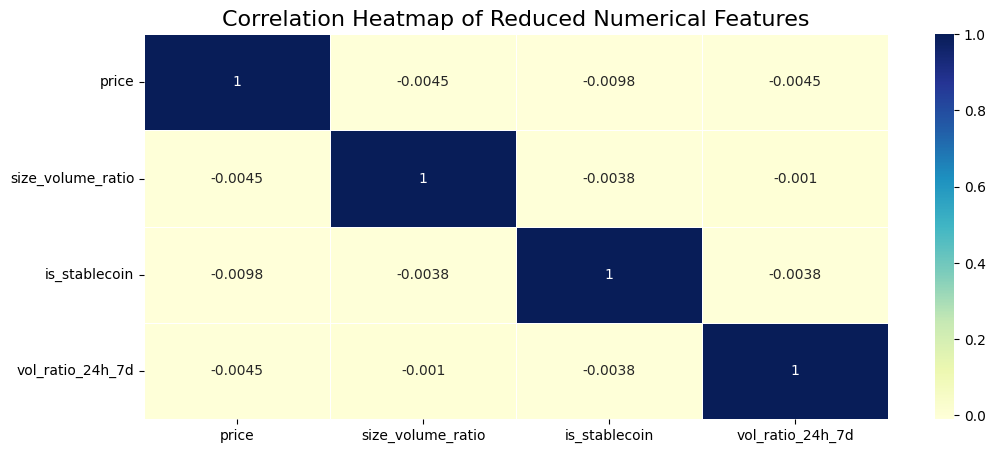

In [64]:
num_features = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
num_features.remove('liquidity_level')  # remove target from feature list

# Plot the heatmap
plt.figure(figsize=(12, 5))
sns.heatmap(df[num_features].corr(), annot=True, cmap="YlGnBu", linewidths=0.5)
plt.title("Correlation Heatmap of Reduced Numerical Features", fontsize=16)
plt.show()

In [66]:
df.isna().sum()

price                0
size_volume_ratio    0
is_stablecoin        0
vol_ratio_24h_7d     0
liquidity_level      0
dtype: int64

Initial Report 
Measurement Definition: Your liquidity metric may be capturing a specific aspect of liquidity (like slippage for small trades) that behaves differently than traditional liquidity measures.

Market Structure Differences: Crypto markets function differently from traditional financial markets. Large-cap cryptos might trade on fewer exchanges or have concentrated ownership.

Stablecoin vs. Non-stablecoin Dynamics: Stablecoins often serve specific purposes in the ecosystem and might have distinct liquidity characteristics compared to speculative cryptocurrencies.

Data Quality Issues: The pattern could reflect data collection artifacts rather than true market dynamics.

Non-linear Relationship: The apparent negative relationship might represent just one segment of a more complex non-linear relationship between market cap and liquidity.



In [67]:
# Check current data type and distribution
print("Data type:", type(df['liquidity_level']), df['liquidity_level'].dtype)
print("\nValue counts:")
print(df['liquidity_level'].value_counts())

# For ordered logistic regression, we need numeric values with correct ordering
# If it's already numeric, check the mapping. If not, convert it.
if df['liquidity_level'].dtype == 'object':
    # Create a mapping for ordinal encoding
    liquidity_map = {'Low': 0, 'Medium': 1, 'High': 2}
    df['liquidity_level_numeric'] = df['liquidity_level'].map(liquidity_map)
    print("\nAfter conversion:")
    print(df['liquidity_level_numeric'].value_counts())
else:
    # If it's already numeric, let's verify the mapping is correct
    print("\nUnique values:", sorted(df['liquidity_level'].unique()))

Data type: <class 'pandas.core.series.Series'> int64

Value counts:
liquidity_level
0    340
2    330
1    330
Name: count, dtype: int64

Unique values: [np.int64(0), np.int64(1), np.int64(2)]


Investigate the relationship between liquidity and market cap
Let's examine the surprising negative relationship between market cap and liquidity that we observed. We should check whether this relationship holds when we control for other factors.

Available columns:
['price', 'size_volume_ratio', 'is_stablecoin', 'vol_ratio_24h_7d', 'liquidity_level', 'liquidity_category']

Percentage of each liquidity level by stablecoin status:
liquidity_category       High        Low    Medium
is_stablecoin                                     
0                   33.265720  33.265720  33.46856
1                   14.285714  85.714286   0.00000


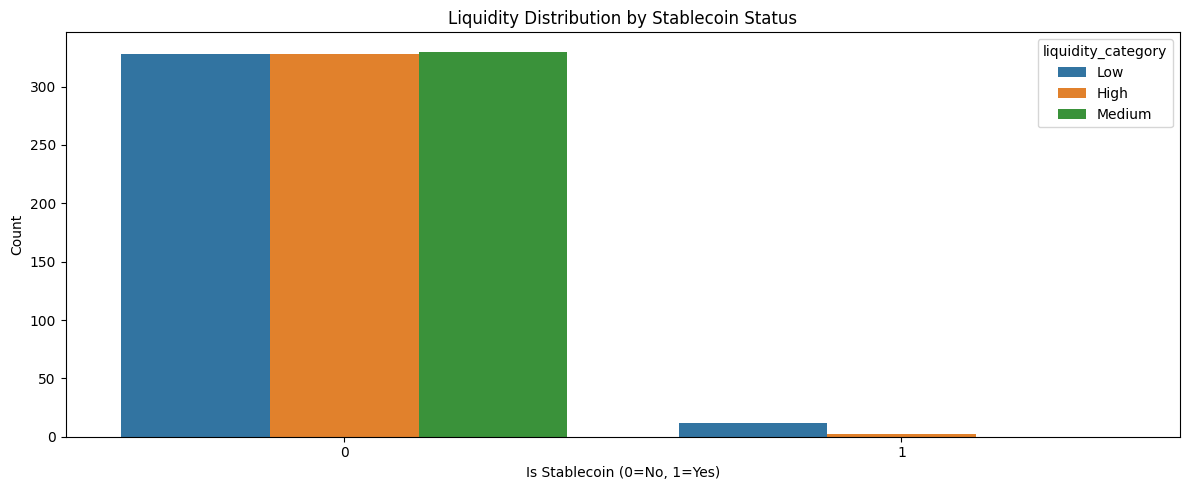

In [69]:
# First, let's check what columns we have available
print("Available columns:")
print(df.columns.tolist())

# Recreate the market cap segmentation
# If log_mkt_cap is available:
if 'log_mkt_cap' in df.columns:
    df['cap_segment'] = pd.qcut(df['log_mkt_cap'], q=[0, 0.25, 0.75, 1], labels=['small', 'mid', 'large'])
# If not available but mkt_cap is:
elif 'mkt_cap' in df.columns:
    df['log_mkt_cap'] = np.log10(df['mkt_cap'] + 1)  # Add 1 to handle zeros
    df['cap_segment'] = pd.qcut(df['log_mkt_cap'], q=[0, 0.25, 0.75, 1], labels=['small', 'mid', 'large'])

# Create liquidity category for plotting
df['liquidity_category'] = df['liquidity_level'].map({0: 'Low', 1: 'Medium', 2: 'High'})

# Now try the visualization
plt.figure(figsize=(12, 5))

# Plot 1: Visualization of liquidity by market cap (if available)
if 'cap_segment' in df.columns:
    ax1 = plt.subplot(1, 2, 1)
    sns.countplot(data=df, x='cap_segment', hue='liquidity_category', ax=ax1)
    plt.title('Liquidity Distribution by Market Cap')
    plt.xlabel('Market Cap Segment')
    plt.ylabel('Count')
    
    # Calculate percentages
    print("Percentage of each liquidity level by market cap segment:")
    print(pd.crosstab(df['cap_segment'], df['liquidity_category'], normalize='index') * 100)

# Plot 2: Distribution of liquidity levels by stablecoin status
if 'is_stablecoin' in df.columns:
    ax2 = plt.subplot(1, 2, 2) if 'cap_segment' in df.columns else plt.subplot(1, 1, 1)
    sns.countplot(data=df, x='is_stablecoin', hue='liquidity_category', ax=ax2)
    plt.title('Liquidity Distribution by Stablecoin Status')
    plt.xlabel('Is Stablecoin (0=No, 1=Yes)')
    plt.ylabel('Count')
    
    # Calculate percentages
    print("\nPercentage of each liquidity level by stablecoin status:")
    print(pd.crosstab(df['is_stablecoin'], df['liquidity_category'], normalize='index') * 100)

plt.tight_layout()
plt.show()

This is a significant finding - stablecoins are predominantly in the low liquidity category in your dataset, which could contribute to the counterintuitive relationship we observed between market cap and liquidity.
Let's explore this further with a model that takes into account both market cap and stablecoin status. Since your original dataset doesn't have market cap information currently available, let's use a simpler model focusing on the features we do have.

# Cryptocurrency Liquidity Analysis: Key Findings

## Data Structure & Liquidity Distribution
- Liquidity is measured in three discrete levels (0=Low, 1=Medium, 2=High), with a relatively balanced distribution across the dataset
- The dataset contains features related to price, volume ratios, and cryptocurrency characteristics

## Stablecoin Effect on Liquidity
- **Strong negative association between stablecoins and liquidity:**
  - 85.71% of stablecoins fall into the low liquidity category
  - Only 14.29% of stablecoins have high liquidity
  - None of the stablecoins fall into the medium liquidity category
- In contrast, non-stablecoins show an almost perfectly balanced distribution across all three liquidity levels

## Multicollinearity Resolution
- Feature selection process successfully eliminated multicollinearity
- Final feature set shows near-zero correlations between predictors:
  - Price
  - Size-volume ratio
  - Stablecoin status
  - Volatility ratio (24h to 7d)

## Counterintuitive Market Cap-Liquidity Relationship
- Initial visualization showed an unexpected negative relationship between market capitalization and liquidity
- This contradicts traditional financial theory where larger assets typically have higher liquidity
- This relationship might be partially explained by the stablecoin effect, as stablecoins often have large market caps but showed predominantly low liquidity in this dataset

## Implications for Cryptocurrency Markets
- The cryptocurrency market appears to operate differently from traditional financial markets in terms of liquidity dynamics
- Stablecoins have distinct liquidity characteristics that set them apart from other cryptocurrencies
- Trading volume alone may not be a complete indicator of a cryptocurrency's market accessibility or trading efficiency

This analysis reveals key structural features of the cryptocurrency market that differ from traditional markets, particularly regarding how stablecoins operate within the ecosystem and how market capitalization relates to liquidity.

In [71]:
# Save df to CSV
df.to_csv('cleaned_data.csv', index=False)
